In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Codingan stupen py/Final Project/sentiment_analysis.csv')
df.head()

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook
2,2017,8,18,night,Don't angry me,negative,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram


In [ ]:
df.isnull().sum()

,0
Year,0
Month,0
Day,0
Time of Tweet,0
text,0
sentiment,0
Platform,0


In [ ]:
df['sentiment'].value_counts()

,count
sentiment,
neutral,199
positive,166
negative,134


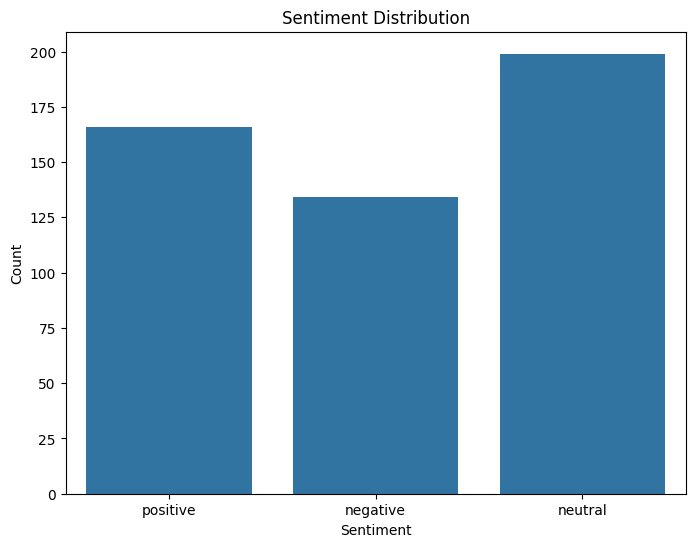

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [ ]:
df = df[['text', 'sentiment']]
df.head()

,text,sentiment
0,What a great day!!! Looks like dream.,positive
1,"I feel sorry, I miss you here in the sea beach",positive
2,Don't angry me,negative
3,We attend in the class just for listening teac...,negative
4,"Those who want to go, let them go",negative


In [ ]:
x = df['text']
y = df['sentiment']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(399,) (100,) (399,) (100,)


# Spliting Data

# Text Processing

In [ ]:
import nltk
# Mengunduh stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

#himpunan/set
STOPWORDS = set(stopwords.words('english'))

#fungsi untuk meremove
def remove_stopwords(text):
    return ' '.join([word for word in str(text).split() if word not in STOPWORDS])

df['text'] = df['text'].apply(remove_stopwords)

#mengubah kata -> dasar tanpa mempertimbangkan makna
stemmer = PorterStemmer()

def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

df['text'] = df['text'].apply(stem_words)

#mengubah kata -> kata dasar
lemmatizer = WordNetLemmatizer()

def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df['text'] = df['text'].apply(lemmatize_words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
df['text'] = df['text'].str.lower()
df.head()

,text,sentiment
0,what a great day!!! looks like dream.,positive
1,"i feel sorry, i miss you here in the sea beach",positive
2,don't angry me,negative
3,we attend in the class just for listening teac...,negative
4,"those who want to go, let them go",negative


In [ ]:
# menghapus link "http" atau "https"
pattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
df["text"] = df["text"].apply(lambda x: re.sub(pattern, '', x))
df.head()

,text,sentiment
0,what a great day!!! looks like dream.,positive
1,"i feel sorry, i miss you here in the sea beach",positive
2,don't angry me,negative
3,we attend in the class just for listening teac...,negative
4,"those who want to go, let them go",negative


In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
#fungsi untuk menghapus punctuation
def remove_punc(text):
  for punc in string.punctuation: # string.punctuation -> mencangkup kumpulan tanda baca dalam string
    text = text.replace(punc, " ") # jika ada teks yang ada punctuationnya diganti dengan spasi (" ")
  return text

df["text"] = df["text"].apply(lambda x: remove_punc(x))
df.head()

,text,sentiment
0,what a great day looks like dream,positive
1,i feel sorry i miss you here in the sea beach,positive
2,don t angry me,negative
3,we attend in the class just for listening teac...,negative
4,those who want to go let them go,negative


In [ ]:
# fungsi untuk menghapus duplikat karakter
def remove_duplicate(text):

    return re.sub(r'(.)\1+', r'\1\1', text)

df["text"] = df["text"].apply(lambda x: remove_duplicate(x))
df.head()

,text,sentiment
0,what a great day looks like dream,positive
1,i feel sorry i miss you here in the sea beach,positive
2,don t angry me,negative
3,we attend in the class just for listening teac...,negative
4,those who want to go let them go,negative


# Word Count

In [ ]:
from collections import Counter

# Assuming X_train is a pandas Series or list of strings
def total_kata(x_train):
  """Counts the total number of unique words in X_train."""
  all_words = []
  for text in x_train:
    words = text.lower().split()
    all_words.extend(words)
  word_counts = Counter(all_words)
  return len(word_counts)


total_kata = total_kata(x_train)
print("Total kata unique di x_train:", total_kata)

Total kata unique di x_train: 1394


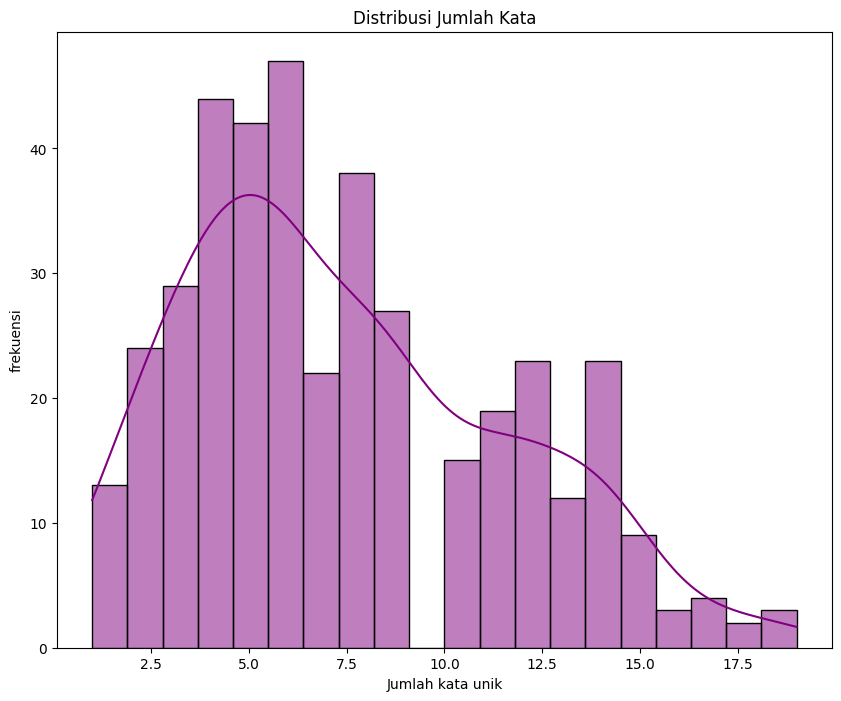

In [ ]:
total_kata = x_train.apply(lambda x: len(set(x.split())))

plt.figure(figsize=(10, 8))
sns.histplot(total_kata, bins=20, kde=True, color='purple')
plt.title('Distribusi Jumlah Kata')
plt.xlabel('Jumlah kata unik')
plt.ylabel('frekuensi')
plt.show()

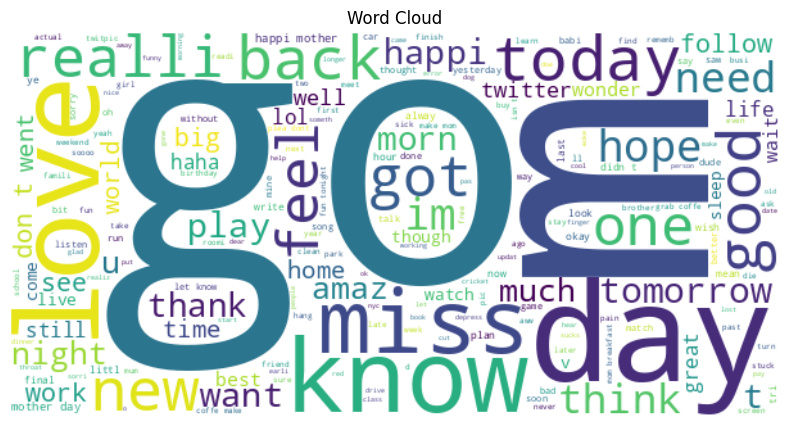

In [ ]:
#Melihat kata yang sering muncul
from wordcloud import WordCloud

text = " ".join(x_train)

wordcloud = WordCloud(width=600, height=300, background_color="white").generate(text)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud")
plt.tight_layout()
plt.show()

# Feature Engineering

In [ ]:
# Mengubah teks direpresentasikan menjadi numerik
from sklearn.feature_extraction.text import TfidfVectorizer

# Membuat objek TfidfVectorizer
vectorizer = TfidfVectorizer(
            stop_words='english',
            max_features=10000,
            ngram_range=(1, 2))

vectorizer.fit(x_train) #Melatih dengan data latih
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

print(x_train_vectorized.shape)
print(x_test_vectorized.shape)

(399, 2550)
(100, 2550)


# Modeling

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Inisialisasi model
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier()

}

# Evaluasi model

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
for name, model in models.items():
    print(f"Training {name}")
    model.fit(x_train_vectorized.toarray(), y_train)
    y_pred = model.predict(x_test_vectorized.toarray())

    # Evaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy*100}%")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    print("-" * 60)

Training Logistic Regression
Accuracy: 66.0%
Classification Report:
              precision    recall  f1-score   support

    negative       0.94      0.42      0.58        36
     neutral       0.49      0.93      0.64        30
    positive       0.85      0.68      0.75        34

    accuracy                           0.66       100
   macro avg       0.76      0.68      0.66       100
weighted avg       0.77      0.66      0.66       100

------------------------------------------------------------
Training Naive Bayes
Accuracy: 66.0%
Classification Report:
              precision    recall  f1-score   support

    negative       0.66      0.64      0.65        36
     neutral       0.63      0.57      0.60        30
    positive       0.68      0.76      0.72        34

    accuracy                           0.66       100
   macro avg       0.66      0.66      0.66       100
weighted avg       0.66      0.66      0.66       100

-------------------------------------------------

In [ ]:
# Melatih model Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(x_train_vectorized.toarray(), y_train)

# Memprediksi sentimen pada data uji
y_pred_logreg = logreg_model.predict(x_test_vectorized.toarray())

# Evaluasi model Logistic Regression
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg * 100:.2f}%")
print(f"Classification Report:\n{classification_report(y_test, y_pred_logreg)}")

Logistic Regression Accuracy: 66.00%
Classification Report:
              precision    recall  f1-score   support

    negative       0.94      0.42      0.58        36
     neutral       0.49      0.93      0.64        30
    positive       0.85      0.68      0.75        34

    accuracy                           0.66       100
   macro avg       0.76      0.68      0.66       100
weighted avg       0.77      0.66      0.66       100



In [ ]:
results = pd.DataFrame({
    'Cleaned Text': x_test,       # Menyimpan teks yang sudah dibersihkan
    'Actual': y_test,             # Menyimpan label aktual
    'Predicted': y_pred           # Menyimpan hasil prediksi
})

# Tentukan path dan nama file untuk menyimpan hasil
pth = "/content/drive/MyDrive/Codingan stupen py/Final Project/"
filename = 'data_test.csv'

# Simpan hasil ke CSV
results.to_csv(pth + filename, index=False)

In [ ]:
# prompt: menyimpan data tes yang sudah di text processing kemudian dengan kolom predict dan kolom y_tesnya

# Code to save the test data with predicted and actual sentiment labels is already present in the provided code.
# The following lines perform the task:

results = pd.DataFrame({
    'Cleaned Text': x_test,       # Menyimpan teks yang sudah dibersihkan
    'Actual': y_test,             # Menyimpan label aktual
    'Predicted': y_pred           # Menyimpan hasil prediksi
})

# Tentukan path dan nama file untuk menyimpan hasil
pth = "/content/drive/MyDrive/Codingan stupen py/Final Project/"
filename = 'data_test.csv'

# Simpan hasil ke CSV
results.to_csv(pth + filename, index=False)